# **Comprehensive Analysis of MBTI and IMDb Movie Scores**
#### Coded Ewan Long, Reviewed by Daniel, Sai Nandini and Xiaotong

# 1.0 Importing the Necessary Libraries and the Dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
# Get working directory
current_wd = os.getcwd()
data_wd = f"{current_wd}/data/cleaned"

# Load the df_merged dataset
df_merged = pd.read_csv(data_wd + "/df_merged.csv")

# Display the first few rows of the dataframe
df_merged.head()


,mbti,character,movie_name,release_year,genre,revenue,score,metascore
0,ESFP,Jack Dawson,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
1,ESTP,Brock Lovett,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
2,ESTP,Fifth Officer Harold Lowe,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
3,ESTJ,"Caledon ""Cal"" Hockley",Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
4,ESTJ,Bruce Ismay,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0


# 2.0 Overview of the Relationship between MBTI Personality Types and IMDb Scores

## 2.1 Average Movie Scores by Release Year

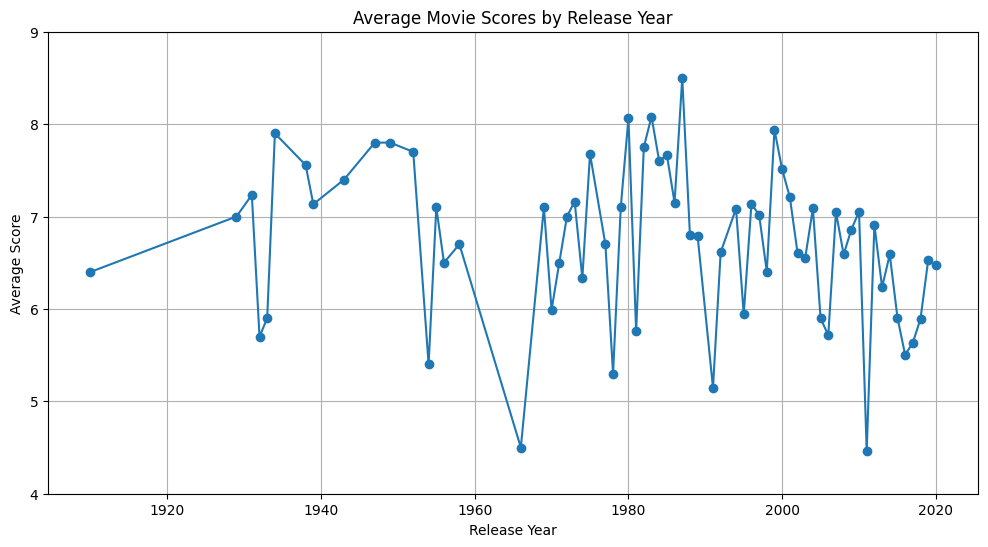

In [3]:
# Importing the matplotlib library for plotting
import matplotlib.pyplot as plt

# Grouping the data by release year and calculating the average score for each year
# This is done by using the groupby method on the 'release_year' column 
# and then applying the mean function to the 'score' column.
average_scores_by_year = df_merged.groupby('release_year')['score'].mean().reset_index()

# Creating a line chart to visualize the data:
plt.figure(figsize=(12, 6))  # Setting the size of the plot
plt.plot(average_scores_by_year['release_year'], average_scores_by_year['score'], marker='o')  # Plotting the data with markers for each year
plt.title('Average Movie Scores by Release Year')  # Adding a title to the chart
plt.ylim(4, 9)  # Setting y-axis limits to 4 to 9
plt.xlabel('Release Year')  # Labeling the x-axis as 'Release Year'
plt.ylabel('Average Score')  # Labeling the y-axis as 'Average Score'
plt.grid(True)  # Adding a grid to the plot for better readability
plt.show()  # Displaying the plot


## 2.2 Density Plot of IMDb Scores for Each MBTI Personality

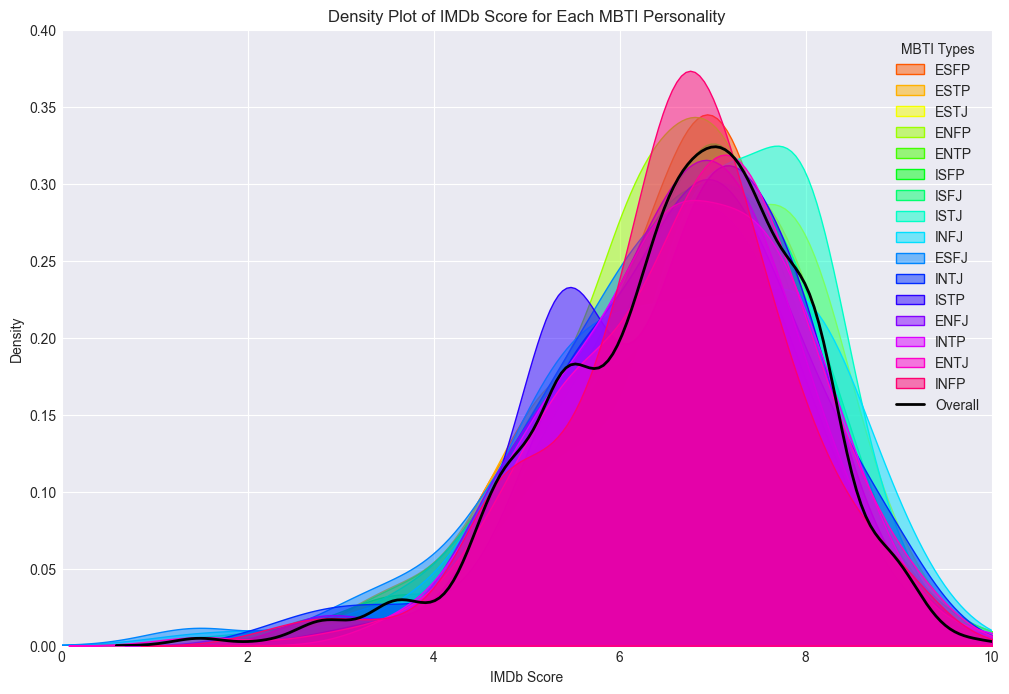

In [4]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for each MBTI type
fig, ax = plt.subplots(figsize=(12, 8))

# Getting unique MBTI types
mbti_types = df_merged['mbti'].unique()

# Creating a colorful palette with enough colors for each MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(mbti_types))

# Plotting the KDE plot for each MBTI type
for i, mbti in enumerate(mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Each MBTI Personality')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()

## 2.3 Density Plot of IMDb Scores for Each MBTI Personality Type Combination

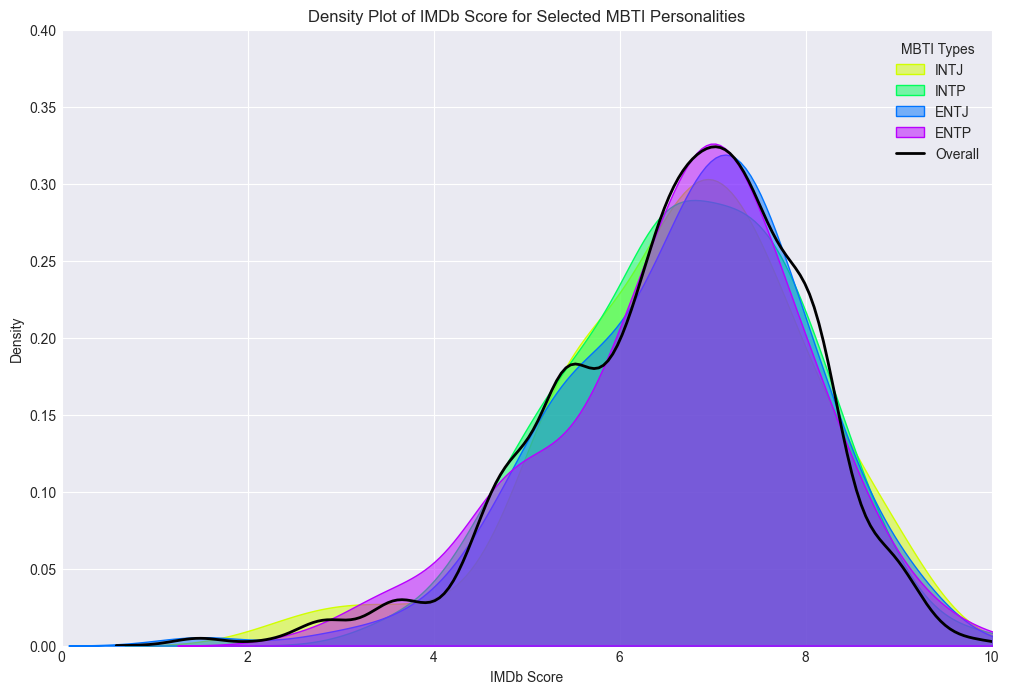

In [5]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for selected MBTI types
fig, ax = plt.subplots(figsize=(12, 8))

# Defining the selected MBTI types
selected_mbti_types = ['INTJ', 'INTP', 'ENTJ', 'ENTP']

# Creating a colorful palette with enough colors for each of the selected MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(selected_mbti_types))

# Plotting the KDE plot for each selected MBTI type
for i, mbti in enumerate(selected_mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score for overall comparison
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Selected MBTI Personalities')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()


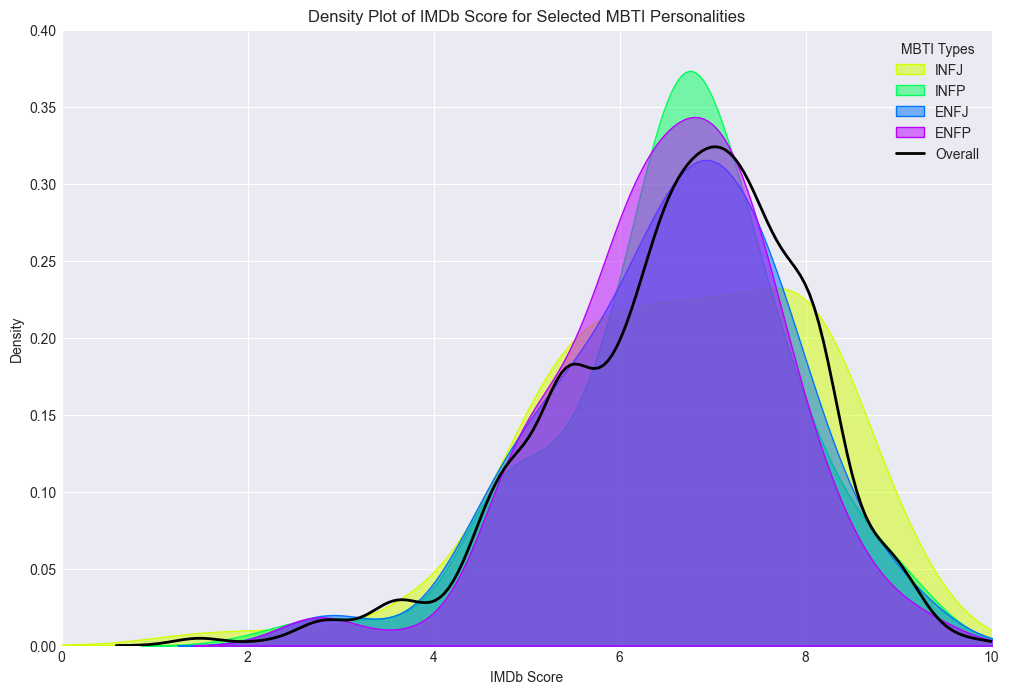

In [6]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for selected MBTI types
fig, ax = plt.subplots(figsize=(12, 8))

# Defining the selected MBTI types
selected_mbti_types = ['INFJ', 'INFP', 'ENFJ', 'ENFP']

# Creating a colorful palette with enough colors for each of the selected MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(selected_mbti_types))

# Plotting the KDE plot for each selected MBTI type
for i, mbti in enumerate(selected_mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score for overall comparison
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Selected MBTI Personalities')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()


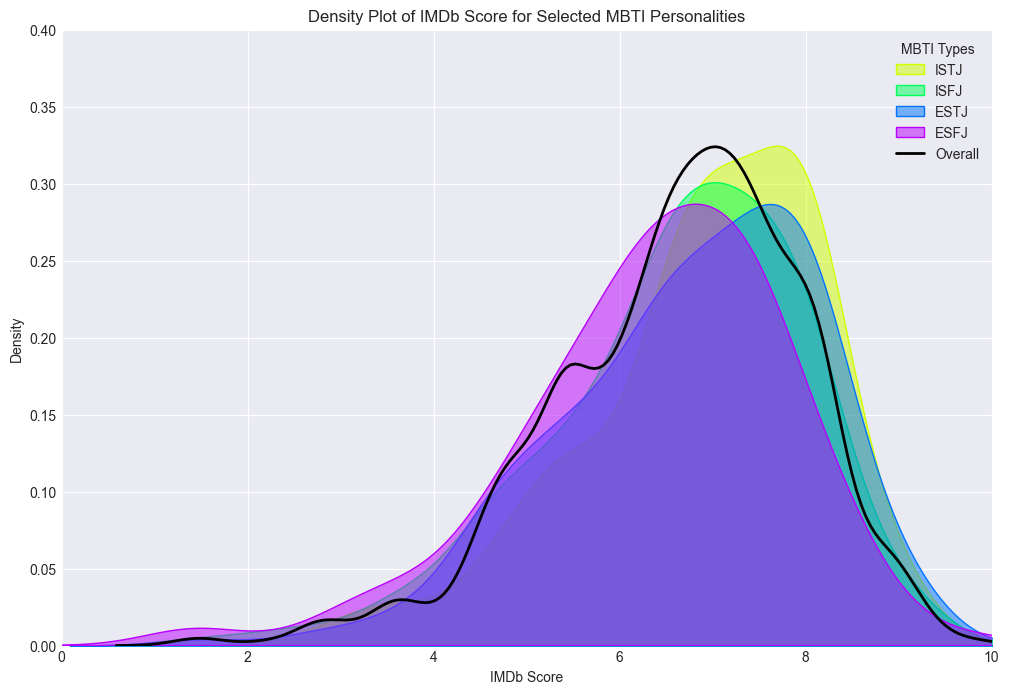

In [7]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for selected MBTI types
fig, ax = plt.subplots(figsize=(12, 8))

# Defining the selected MBTI types
selected_mbti_types = ['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ']

# Creating a colorful palette with enough colors for each of the selected MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(selected_mbti_types))

# Plotting the KDE plot for each selected MBTI type
for i, mbti in enumerate(selected_mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score for overall comparison
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Selected MBTI Personalities')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()


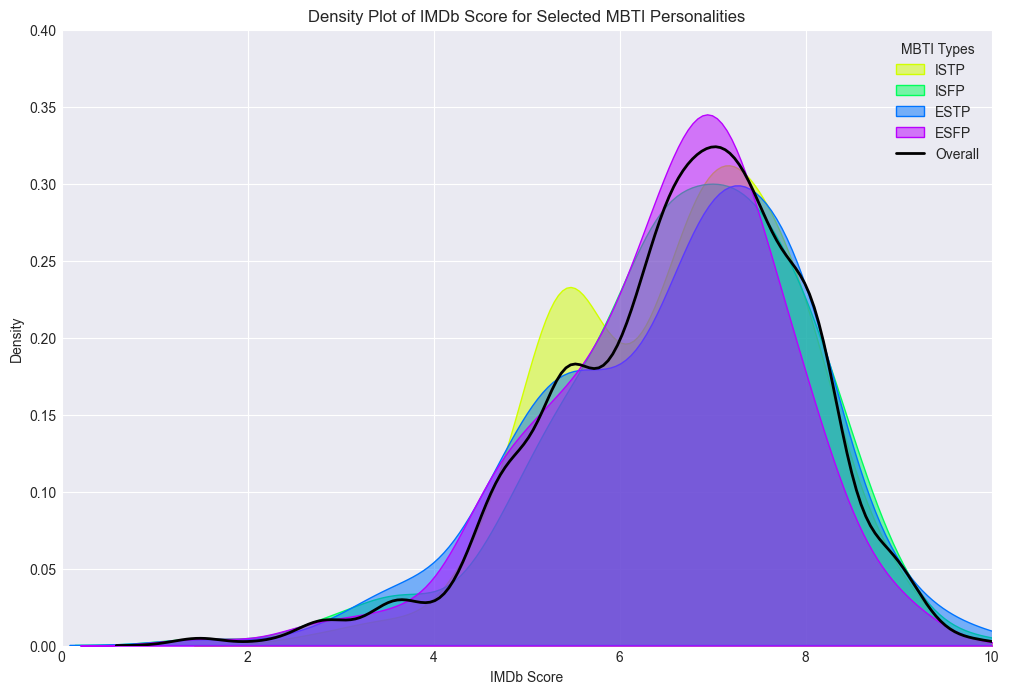

In [8]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for selected MBTI types
fig, ax = plt.subplots(figsize=(12, 8))

# Defining the selected MBTI types
selected_mbti_types = ['ISTP', 'ISFP', 'ESTP', 'ESFP']

# Creating a colorful palette with enough colors for each of the selected MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(selected_mbti_types))

# Plotting the KDE plot for each selected MBTI type
for i, mbti in enumerate(selected_mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score for overall comparison
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Selected MBTI Personalities')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()


# 3.0 MBTI Personality Density in High IMDb Scores and Yearly Average Score Trends for High-Scoring Personalities

## 3.1 Density Plot of High IMDb Score (8-10) for Each MBTI Personality

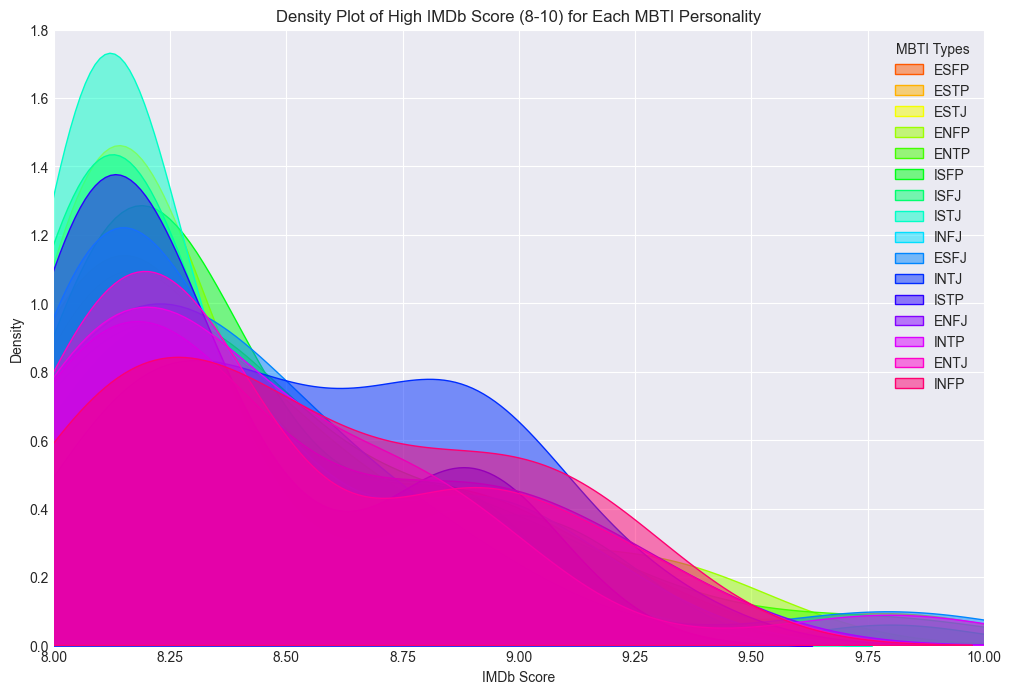

In [9]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Filtering the dataset for scores between 8 and 10
high_score_df = df_merged[df_merged['score'].between(8, 10)]

# Creating a colorful palette with enough colors for each MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(mbti_types))

# Plotting the density plot for each MBTI type
fig, ax = plt.subplots(figsize=(12, 8))

for i, mbti in enumerate(mbti_types):
    sns.kdeplot(high_score_df[high_score_df['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of High IMDb Score (8-10) for Each MBTI Personality')
ax.legend(title='MBTI Types')
plt.xlim(8, 10)  # Setting x-axis limits to 8 to 10
plt.ylim(0, 1.8)  # Setting y-axis limits to 0 to 1.8

plt.show()

## 3.2 Trends in Average Movie Scores by Popular MBTI Categories Over Decades

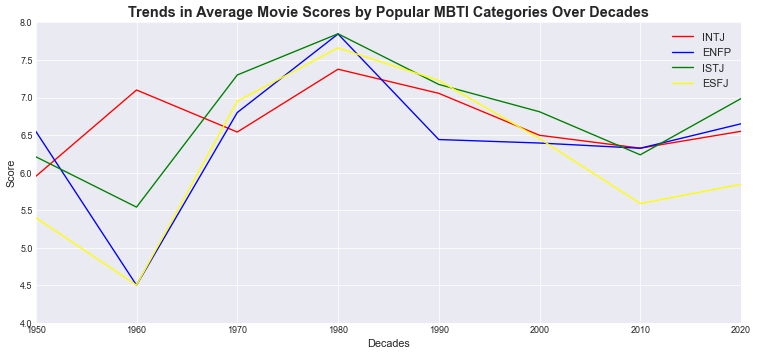

In [10]:
# Convert release year to decade
df_merged['Decade'] = (df_merged['release_year'] // 10 * 10).astype(int)

# List of MBTI types
mbti_types = ['INTJ', 'ENFP', 'ISTJ', 'ESFJ']

# Create a dictionary of dataframes for each MBTI type
df_mbti_dict = {mbti: df_merged[df_merged['mbti'] == mbti] for mbti in mbti_types}

# Colors for each MBTI type
c_list = ['red', 'blue', 'green', 'yellow']

# Labels for each MBTI type
label_list = ['INTJ', 'ENFP', 'ISTJ', 'ESFJ']

# Create a single subplot
fig, ax = plt.subplots(figsize=(14, 6), dpi=65)

# Plot each MBTI type
for (mbti, df_mbti), colour, label in zip(df_mbti_dict.items(), c_list, label_list):
    df_grouped = df_mbti.groupby('Decade')['score'].mean().dropna()
    ax.plot(df_grouped.index, df_grouped.values, c=colour, label=label, alpha=1)

# Set title and labels
ax.set_title('Trends in Average Movie Scores by Popular MBTI Categories Over Decades', fontsize=16, fontweight='bold')
ax.set_xlabel('Decades', fontsize=12)
ax.set_ylabel('Score', fontsize=12)

# Setting x-axis as decades
plt.xlim(1950, 2020)
plt.xticks(range(1950, 2030, 10))

plt.ylim(4, 8)  # Setting y-axis limits to 4 to 8

# Add legend
ax.legend(loc='upper right', fontsize='large')

# Show the plot
plt.show()


# 4.0 Trends in Average Movie Scores by MBTI Categories Over Decades

## 4.1 Trends in Average Movie Scores by MBTI Personality Type Combination Over Decades

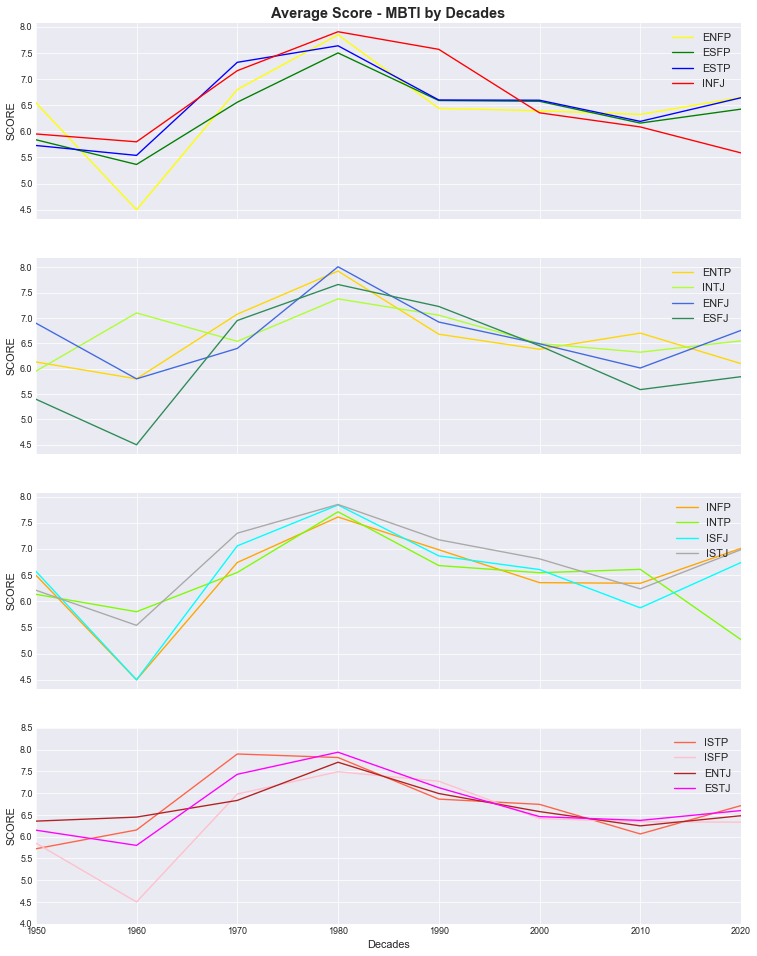

In [11]:
# Convert release year to decade
df_merged['Decade'] = (df_merged['release_year'] // 10 * 10).astype(int)

# MBTI types categorized into four groups
mbti_groups = {
    'Group1': ['ENFP', 'ESFP', 'ESTP', 'INFJ'],
    'Group2': ['ENTP', 'INTJ', 'ENFJ', 'ESFJ'],
    'Group3': ['INFP', 'INTP', 'ISFJ', 'ISTJ'],
    'Group4': ['ISTP', 'ISFP', 'ENTJ', 'ESTJ']
}

# Colors for each group
color_groups = {
    'Group1': ['yellow', 'green', 'blue', 'red'],
    'Group2': ['gold', 'greenyellow', 'royalblue', 'seagreen'],
    'Group3': ['orange', 'lawngreen', 'aqua', 'darkgray'],
    'Group4': ['tomato', 'pink', 'firebrick', 'fuchsia']
}

# Create a dictionary of dataframes for each MBTI type
df_mbti_dict = {mbti: df_merged[df_merged['mbti'] == mbti] for mbti in mbti_groups['Group1'] + mbti_groups['Group2'] + mbti_groups['Group3'] + mbti_groups['Group4']}

# Create subplots
fig, axes = plt.subplots(figsize=(14,18), nrows=4, dpi=65, sharex=True)

# Plot each group in its respective subplot
for i, (group, ax) in enumerate(zip(mbti_groups.keys(), axes)):
    for mbti, color in zip(mbti_groups[group], color_groups[group]):
        df_grouped = df_mbti_dict[mbti].groupby('Decade')['score'].mean().dropna()
        ax.plot(df_grouped.index, df_grouped.values, c=color, label=mbti, alpha=1)
        ax.legend(loc='upper right', fontsize='large')
        ax.set_ylabel('SCORE', fontsize=12)

# Set common features of the plot
axes[0].set_title('Average Score - MBTI by Decades', fontsize=16, fontweight='bold')
plt.xlim(1950, 2020) # Setting x-axis limits to 1950 to 2020
plt.ylim(4, 8.5)  # Setting y-axis limits to 4 to 8.5
plt.xticks(range(1950, 2030, 10))
plt.xlabel('Decades', fontsize=12)

# Show the plot
plt.show()


## 4.2 Distribution of Average Scores by MBTI Type

In [12]:
# Calculate the average score for each MBTI type and sort them
score_mbti = df_merged.groupby('mbti')['score'].mean().sort_values(ascending=False)
score_mbti_lst = score_mbti.index.tolist()

# Create a DataFrame for box plot
score_mbti_df = df_merged[df_merged['mbti'].isin(score_mbti_lst)]

# Create the box plot
fig = px.box(score_mbti_df, 
             x='mbti', 
             y='score', 
             color='mbti',
             category_orders={'mbti': score_mbti_lst})

# Update layout
fig.update_layout(
    title_text='Distribution of Average Scores by MBTI Type',  # Revised title
    xaxis=dict(
        title='MBTI',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Score',
        titlefont_size=16
    ),
    template='plotly_white'
)

# Update traces
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)

# Show the plot
fig.show()


## 4.3 MBTI VS Score Heatmap by Decade

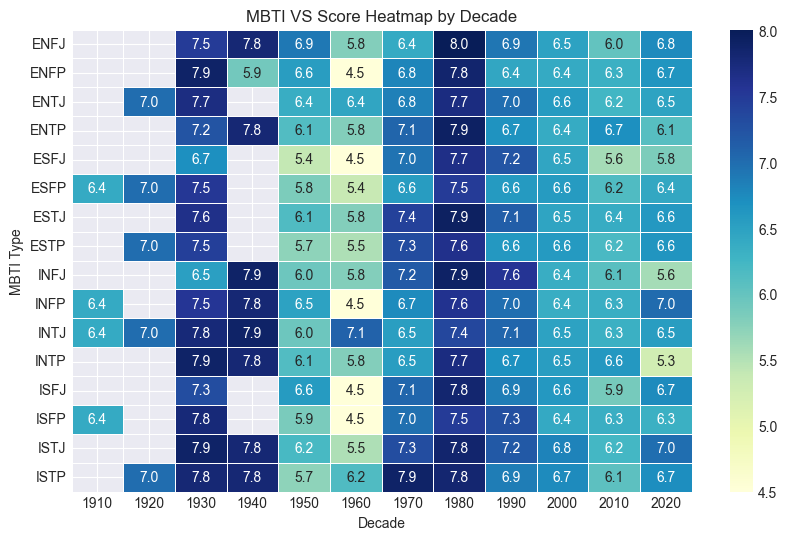

In [13]:
# Creating a pivot table for the heatmap data
heatmap_data = df_merged.pivot_table(values='score', index='mbti', columns='Decade', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('MBTI VS Score Heatmap by Decade')
plt.ylabel('MBTI Type')
plt.xlabel('Decade')
plt.show()

## 4.3 Top 3 MBTI Types by Average Score Across Years

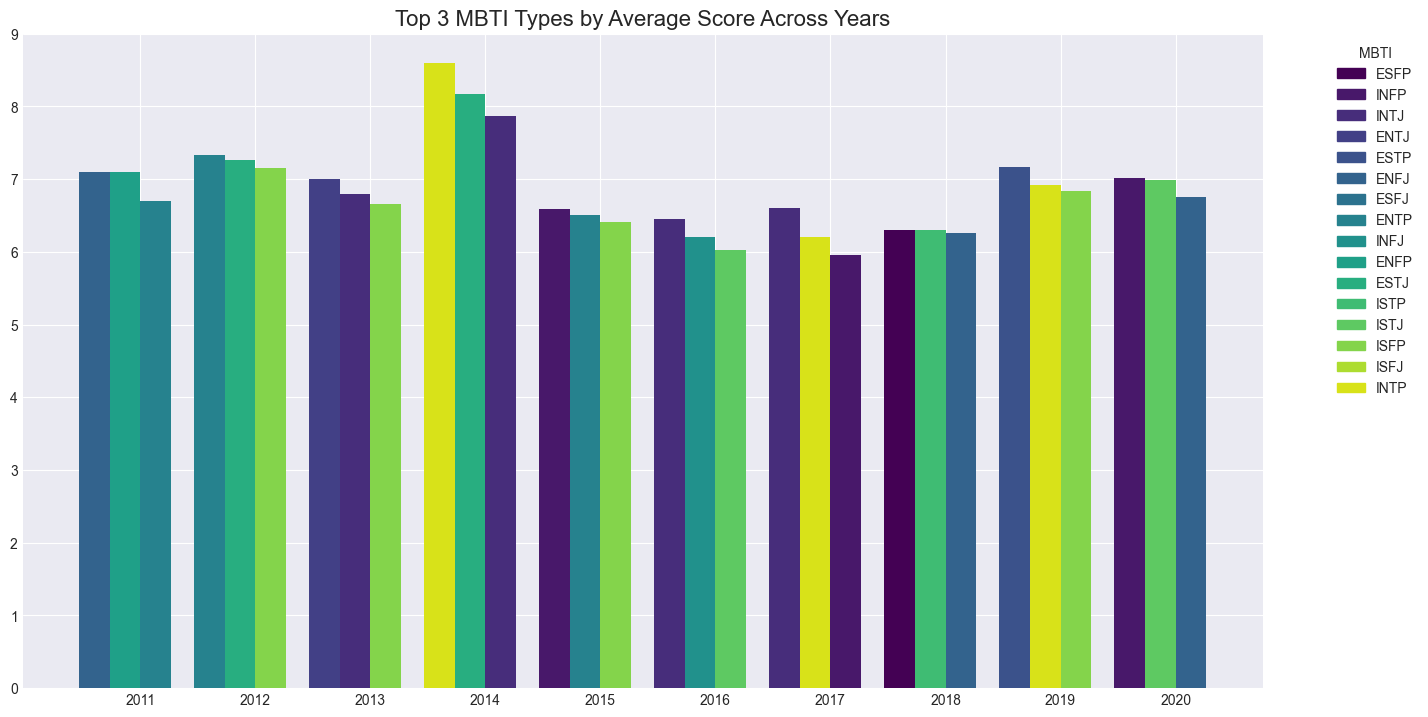

In [14]:
# Calculate the average score for each MBTI type per release year
average_score = df_merged.groupby(['release_year', 'mbti'])['score'].mean().reset_index()

# Extract the top three MBTI types for each release year based on the average score
top3_mbti = average_score.groupby('release_year').apply(lambda x: x.nlargest(3, 'score')).reset_index(drop=True)

mbtis = top3_mbti['mbti'].unique()

# Selecting the last 30 entries to focus on more recent data
num_rows = top3_mbti.shape[0]
subset_df = top3_mbti.iloc[num_rows-30:num_rows].copy()  # Explicitly create a copy to avoid SettingWithCopyWarning

# Converting 'release_year' to integer for better x-axis formatting
subset_df['release_year'] = subset_df['release_year'].astype(int)

# Create a new figure and axis for plotting
fig, ax = plt.subplots(figsize=(16, 8.5))

# Calculate bar width based on the number of unique MBTI types per year
year_mbti_count = subset_df.groupby('release_year')['mbti'].nunique()
max_count = year_mbti_count.max()
bar_width = 0.8 / max_count  # Width of each bar

# Using the colormap directly without specifying the number of colors
color_map = mpl.colormaps.get_cmap('viridis')
# Normalizing the index for each MBTI type to fit within the colormap range
mbti_colors = {mbti: color_map(i / len(mbtis)) for i, mbti in enumerate(mbtis)}

# Plot bars for each MBTI type per year
for year in sorted(subset_df['release_year'].unique()):
    year_data = subset_df[subset_df['release_year'] == year]
    for i, (index, row) in enumerate(year_data.iterrows()):
        color = mbti_colors[row['mbti']]
        ax.bar(year + i * bar_width, row['score'], width=bar_width, color=color, label=row['mbti'] if year == min(subset_df['release_year']) and i == 0 else "")

# Set x-ticks to be in the middle of the groups
ax.set_xticks([year + bar_width * year_mbti_count[year] / 2 for year in sorted(subset_df['release_year'].unique())])
ax.set_xticklabels(sorted(subset_df['release_year'].unique()))

plt.ylim(0, 9)  # Setting y-axis limits to 0 to 9

# Set the title and legend of the plot
ax.set_title('Top 3 MBTI Types by Average Score Across Years', fontsize=16)

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=mbti_colors[mbti]) for mbti in mbtis]
ax.legend(handles, mbtis, title='MBTI', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## 4.4 Correlation Between MBTI Types and IMDb Scores

r^2 = 0.066


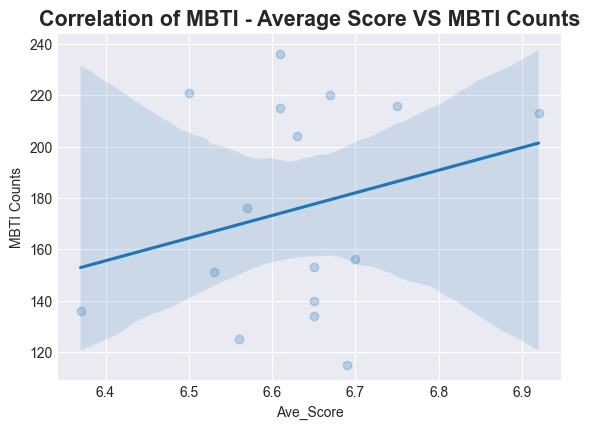

In [15]:
# Add a count column to the dataframe
df_merged['Count'] = 1

# Group by MBTI, calculate mean score and count, then sort by score
df_rate_dir = df_merged.groupby('mbti').agg({'score': 'mean', 'Count': 'sum'}).sort_values(by='score', ascending=False)
df_rate_dir['score'] = round(df_rate_dir['score'], 2)
df_rate_dir.columns = ['Ave_Score', 'MBTI Counts']

# Set up the plot
fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Plot data using seaborn's regplot
sns.regplot(x='Ave_Score', y='MBTI Counts', data=df_rate_dir, ax=ax, scatter_kws={'alpha': 0.25})
ax.set_title('Correlation of MBTI - Average Score VS MBTI Counts', fontsize=15.5, fontweight='heavy')

# Calculate and print R^2 value
lin_reg = LinearRegression().fit(df_rate_dir[['Ave_Score']], df_rate_dir['MBTI Counts'])
r2 = lin_reg.score(df_rate_dir[['Ave_Score']], df_rate_dir['MBTI Counts'])
print(f'r^2 = {round(r2, 3)}')

# Remove top and right borders
sns.despine()

# Show the plot
plt.show()
